# Nengo Assignment 1 - Computing with Neurons

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo

## 1.1: Installing Nengo and Nengo GUI

Before installation, you will need a computer that has Python and NumPy installed.  If you are not familiar with installing these, we recommend installing Anaconda, which is a Python distribution that comes with a lot of extra packages, including NumPy.  It is available here: https://www.continuum.io/downloads

The Python version can be 2.7, 3.4, or 3.5.  If you do not have a preference among those versions, we tend to most commonly use 2.7.

Once you have this installed, go to the command line and do:
```
pip install nengo
pip install nengo_gui
```
 
You should now be able to run Nengo by running:
```
nengo
```



## 1.2: Tutorials

In Nengo GUI, if you click on the "open" icon in the top-left and select ```built-in examples``` and then ```tutorial``` you will find a list of tutorial models that cover a wide variety of Nengo functionality.  For this first assignment, look through tutorials 00 through 10.  This provides both a reminder of some of the things discussed in class and example code that provides the required programming syntax.

## 1.3: Representation

Build an ```Ensemble``` of 100 neurons (```n_neurons=100```) that represents one value (```dimensions=1```).  Create a stimulus ```Node``` that has a value of ```[0]``` and a ```Connection``` that connects the ```Node``` to the ```Ensemble```.  

Run this model.  Use a slider to adjust the input value, and display the decoded output value from the neurons.  How accurate are these neurons at representing this value?  What happens if you input values outside of the range -1 to 1?  (you can right-click on the slider and select ```"Set range..."``` to adjust its range).

Increase the ```radius``` of the ```Ensemble``` to 10.  Now what range of values is it good at representing?  How does this affect the accuracy of the representation?

Increase the number of neurons to 500.  How does this affect the accuracy of the representation?

Building finished in 0:00:01.                                                                                                                                                                                                      
Simulating finished in 0:00:01.                                                                                                                                                                                                    
Building finished in 0:00:01.                                                                                                                                                                                                      
Simulating finished in 0:00:01.                                                                                                                                                                                                    
Building finished in 0:00:01.                                                           

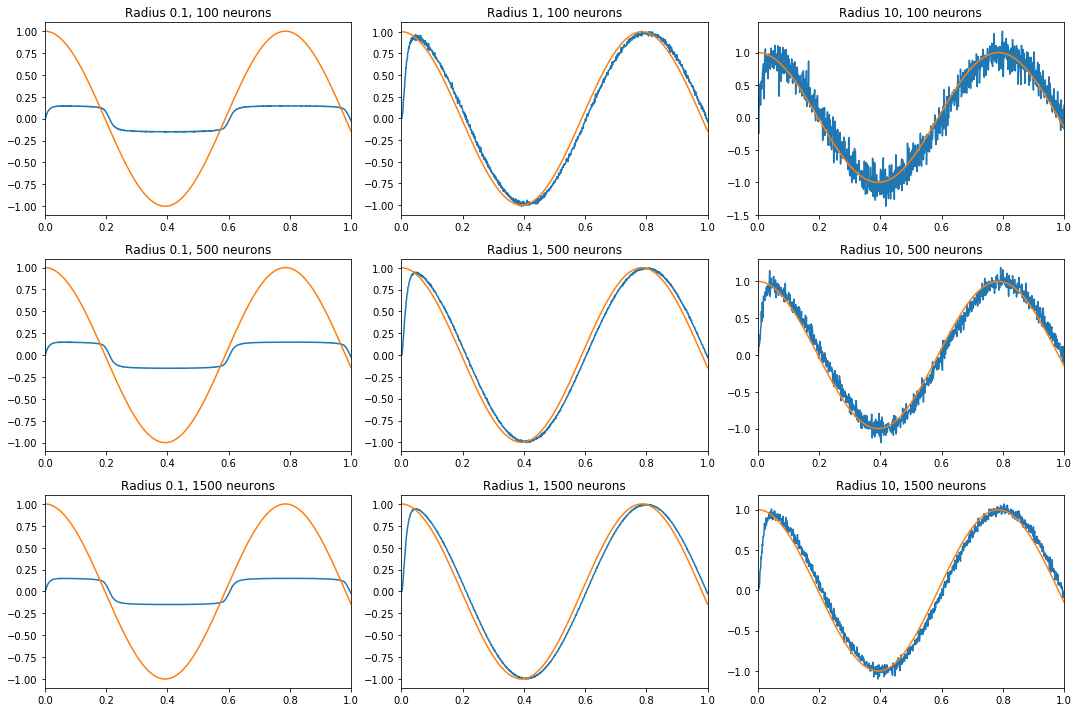

In [11]:
import itertools

def model_and_run(n_neurons, radius):
    model = nengo.Network()
    with model:
        #stim = nengo.Node([0])
        stim = nengo.Node(lambda t: np.cos(8 * t))
        ensemble = nengo.Ensemble(n_neurons=n_neurons, dimensions=1, radius=radius)
        nengo.Connection(stim, ensemble)

        # probes
        inp = nengo.Probe(stim)  # The original input
        spikes = nengo.Probe(ensemble.neurons)  # The raw spikes from the neuron
        voltage = nengo.Probe(ensemble.neurons,'voltage')  # Subthreshold soma voltage of the neuron
        filtered = nengo.Probe(ensemble, synapse=0.01)  # Spikes filtered by a 10ms post-synaptic filter

    with nengo.Simulator(model) as sim:  # Create the simulator
        sim.run(1, progress_bar=True)  # Run it for 1 second

    return sim, (filtered, inp)


plt.figure(figsize=(15,10))
i = 1
for n_neurons, radius in itertools.product([100,500,1500], [0.1,1,10]):
    
    sim, (filtered, inp) = model_and_run(n_neurons, radius)

    # Plot the decoded output of the ensemble
    plt.subplot(3,3,i)
    i += 1
    plt.plot(sim.trange(), sim.data[filtered])
    plt.plot(sim.trange(), sim.data[inp])
    plt.xlim(0, 1)
    plt.title("Radius {}, {} neurons".format(radius, n_neurons))
plt.tight_layout()
plt.show()

## 1.4: Multidimensional Representation

Now build an ```Ensemble``` of 300 neurons that represents 3 values (```dimensions=3```).  Provide it with input from a ```Node``` that also has three values (```[0, 0, 0]```).  How well does this represent these three values?  What happens if you try to feed in the value ```[1, 1, 1]```?  What sort of error does it make?

Adjust the radius to 1.7 and try representing ```[1, 1, 1]``` again.  Has the representation accuracy improved?  Why or why not?

Building finished in 0:00:01.                                                                                                                                                                                                      
Simulating finished in 0:00:01.                                                                                                                                                                                                    
Building finished in 0:00:01.                                                                                                                                                                                                      
Simulating finished in 0:00:01.                                                                                                                                                                                                    
Building finished in 0:00:01.                                                           

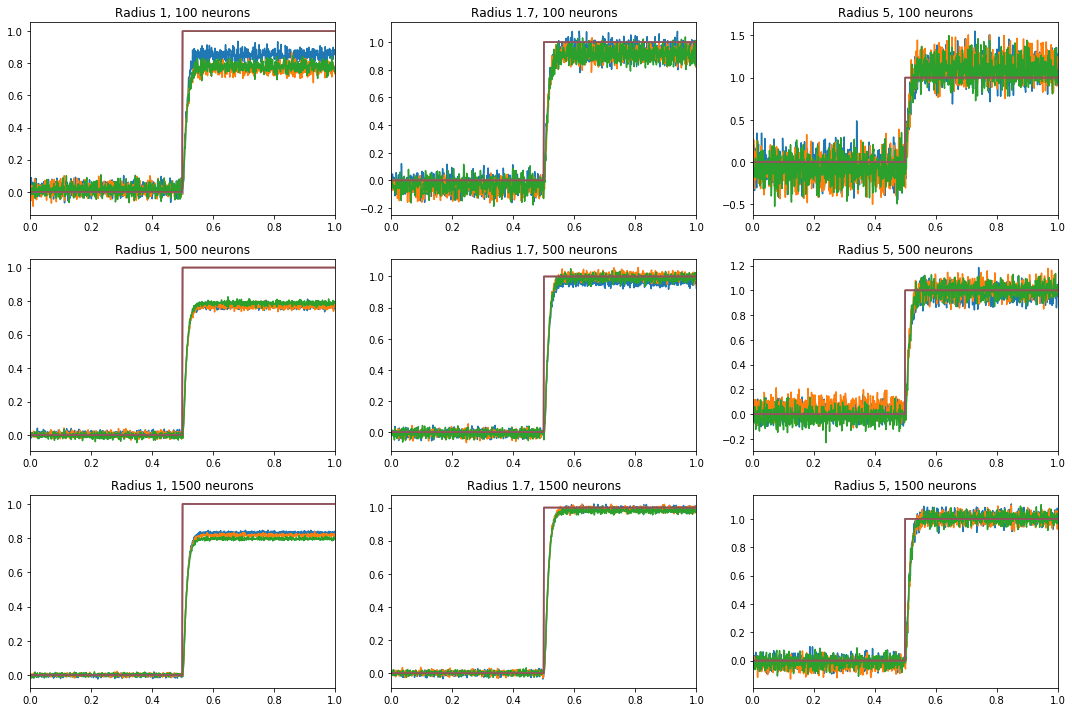

In [15]:
import itertools

def model_and_run(n_neurons, radius):
    model = nengo.Network()
    with model:
        #stim = nengo.Node([0])
        stim = nengo.Node(lambda t: np.zeros(3) if t < 0.5 else np.ones(3)  )
        ensemble = nengo.Ensemble(n_neurons=n_neurons, dimensions=3, radius=radius)
        nengo.Connection(stim, ensemble)

        # probes
        inp = nengo.Probe(stim)  # The original input
        spikes = nengo.Probe(ensemble.neurons)  # The raw spikes from the neuron
        voltage = nengo.Probe(ensemble.neurons,'voltage')  # Subthreshold soma voltage of the neuron
        filtered = nengo.Probe(ensemble, synapse=0.01)  # Spikes filtered by a 10ms post-synaptic filter

    with nengo.Simulator(model) as sim:  # Create the simulator
        sim.run(1, progress_bar=True)  # Run it for 1 second

    return sim, (filtered, inp)


plt.figure(figsize=(15,10))
i = 1
for n_neurons, radius in itertools.product([100,500,1500], [1,1.7,5]):
    
    sim, (filtered, inp) = model_and_run(n_neurons, radius)

    # Plot the decoded output of the ensemble
    plt.subplot(3,3,i)
    i += 1
    plt.plot(sim.trange(), sim.data[filtered])
    plt.plot(sim.trange(), sim.data[inp])
    plt.xlim(0, 1)
    plt.title("Radius {}, {} neurons".format(radius, n_neurons))
plt.tight_layout()
plt.show()

## 1.5: Communication

Build two 1-dimensional ```Ensemble```s with 100 neurons each.  Create an input ```Node``` with a value of ```[0]``` and connect that into the first ```Ensemble```.  Connect the first ```Ensemble``` to the second ```Ensemble```.

Now when you vary the slider for the input ```Node```, this should affect the represented value in both ```Ensemble```s.  

On the ```Connection``` from the first ```Ensemble``` to the second, set the ```synapse``` to 0.1 (a 100ms synaptic time constant).  How does this affect the communication of the value from the first to the second?  What happens with a shorter time constant (0.001)?  Or a longer one (1)?   (Note: the default if you do not specify the synapse is 0.005).

Building finished in 0:00:01.                                                                                                                                                                                                      
Simulating finished in 0:00:01.                                                                                                                                                                                                    
Building finished in 0:00:01.                                                                                                                                                                                                      
Simulating finished in 0:00:01.                                                                                                                                                                                                    
Building finished in 0:00:01.                                                           

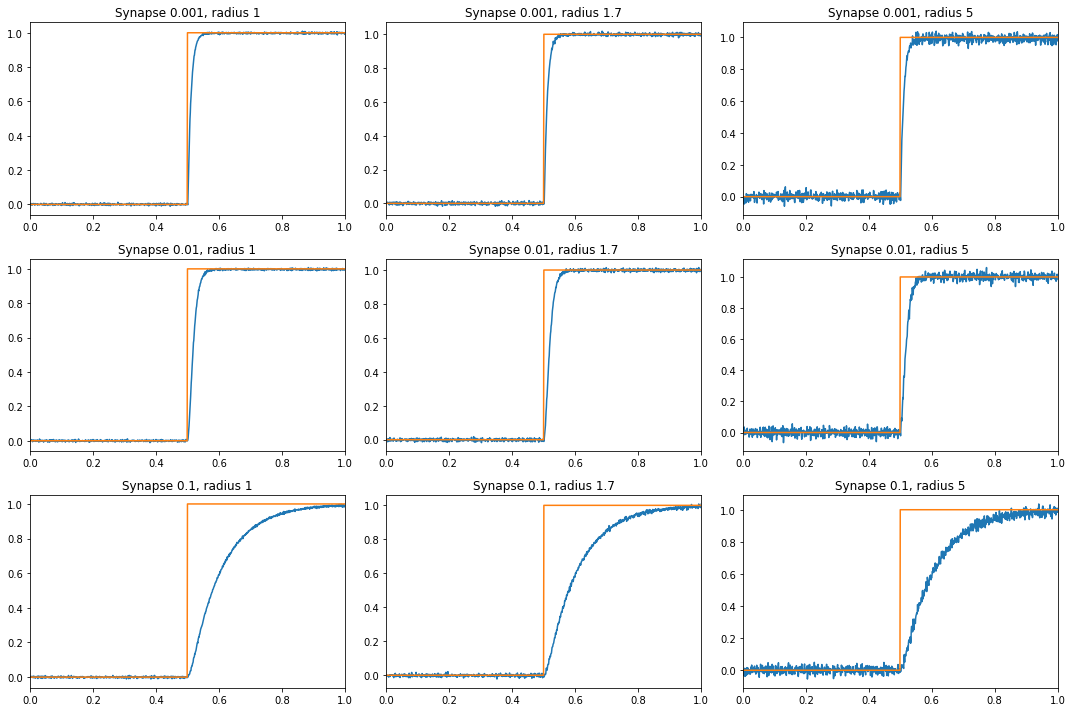

In [20]:
import itertools

def model_and_run(n_neurons, radius, synapse):
    model = nengo.Network()
    with model:
        #stim = nengo.Node([0])
        stim = nengo.Node(lambda t: np.zeros(1) if t < 0.5 else np.ones(1)  )
        ensemble = nengo.Ensemble(n_neurons=n_neurons, dimensions=1, radius=radius)
        nengo.Connection(stim, ensemble, synapse=synapse)

        # probes
        inp = nengo.Probe(stim)  # The original input
        spikes = nengo.Probe(ensemble.neurons)  # The raw spikes from the neuron
        voltage = nengo.Probe(ensemble.neurons,'voltage')  # Subthreshold soma voltage of the neuron
        filtered = nengo.Probe(ensemble, synapse=0.01)  # Spikes filtered by a 10ms post-synaptic filter

    with nengo.Simulator(model) as sim:  # Create the simulator
        sim.run(1, progress_bar=True)  # Run it for 1 second

    return sim, (filtered, inp)


plt.figure(figsize=(15,10))
i = 1
for synapse, radius in itertools.product([0.001,0.01,0.1], [1,1.7,5]):
    
    sim, (filtered, inp) = model_and_run(n_neurons, radius, synapse)

    # Plot the decoded output of the ensemble
    plt.subplot(3,3,i)
    i += 1
    plt.plot(sim.trange(), sim.data[filtered])
    plt.plot(sim.trange(), sim.data[inp])
    plt.xlim(0, 1)
    plt.title("Synapse {}, radius {}".format(synapse, radius))
plt.tight_layout()
plt.show()

## 1.6: Computation

Build the same network as the previous question, but when you make the ```Connection``` from the first ```Ensemble``` to the second, have it compute the square of the value.  That is, have it compute this function:

```python
def square(x):
    return x[0]*x[0]
```

How accurate is this computation?  

Try the function ```10*x[0]*x[0]```.  How accurate is this?  What could you change about the model to improve the accuracy?

## 1.7 Multiple Computations

Build a system where you have a two-dimensional input ```Node``` into a two-dimensional ```Ensemble```.  From that ```Ensemble``` form a ```Connection``` to a three-dimensional ```Ensemble``` where the function computed is ```(x[0]*x[0], x[0]*x[1], x[1]*x[1])```   Now form a ```Connection``` from that three-dimensional ```Ensemble``` to a one-dimensional ```Ensemble``` that computes the function ```x[0]+2*x[1]+x[2]```.

What is this system doing?  If your two inputs are ```a``` and ```b```, what should the represented value in the last ```Ensemble``` be?  How accurate is it?  What input values does it have difficulty with?

### Bonus Question

How could you make this system more efficient, in terms of reducing the number of neurons while increasing the accuracy?  As a hint, note that ```a*a + 2*a*b + b*b = (a+b)*(a+b)``` and that sometimes you don't need intermediate steps in a computation.